<a href="https://colab.research.google.com/github/sakaleshhubli/AI/blob/main/LR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("delhi_aqi.csv")

In [ ]:
df.head(3)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
df["date"]= pd.to_datetime(df["date"], errors='coerce', utc=True)
##drop rows with any missing cells
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    18776 non-null  datetime64[ns, UTC]
 1   co      18776 non-null  float64            
 2   no      18776 non-null  float64            
 3   no2     18776 non-null  float64            
 4   o3      18776 non-null  float64            
 5   so2     18776 non-null  float64            
 6   pm2_5   18776 non-null  float64            
 7   pm10    18776 non-null  float64            
 8   nh3     18776 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 1.3 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    18776 non-null  datetime64[ns, UTC]
 1   co      18776 non-null  float64            
 2   no      18776 non-null  float64            
 3   no2     18776 non-null  float64            
 4   o3      18776 non-null  float64            
 5   so2     18776 non-null  float64            
 6   pm2_5   18776 non-null  float64            
 7   pm10    18776 non-null  float64            
 8   nh3     18776 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 1.3 MB


In [ ]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


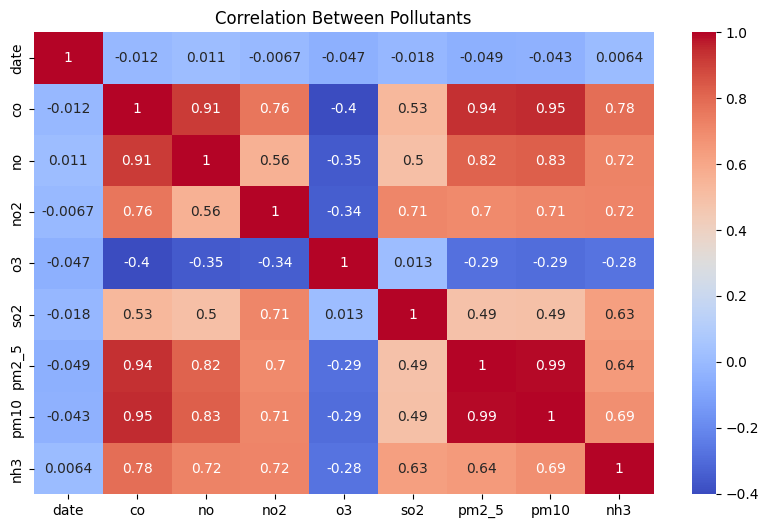

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.show()

In [ ]:
X = df[['no2']]
y = df['pm2_5']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 10: Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:567: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


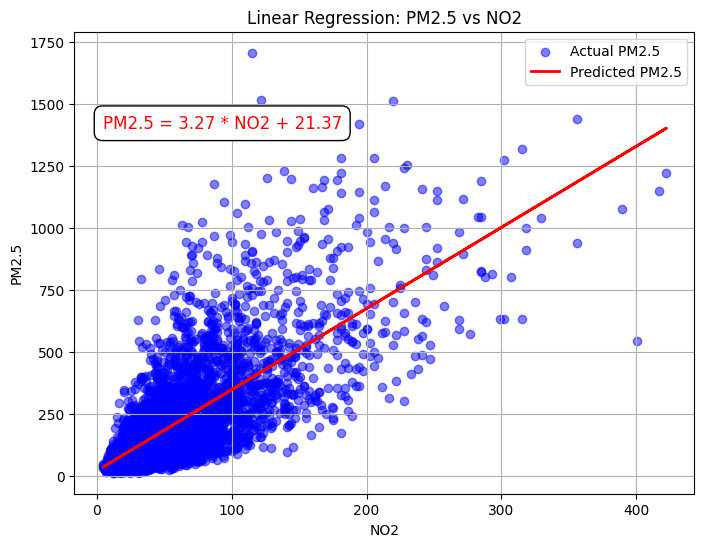

In [ ]:
# 📉 Step 12: Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual PM2.5', alpha=0.5)
y_pred = model.predict(X_test)
slope = model.coef_[0]
intercept = model.intercept_
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted PM2.5')

equation_text = f"PM2.5 = {slope:.2f} * NO2 + {intercept:.2f}"
plt.text(
    x=X_test.min(),           # x-position (left of graph)
    y=y_pred.max(),           # y-position (top of regression line)
    s=equation_text,
    fontsize=12,
    color='red',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.xlabel("NO2")
plt.ylabel("PM2.5")
plt.title("Linear Regression: PM2.5 vs NO2")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Show slope (m) and intercept (c)
print(f"Equation of the line: PM2.5 = {slope:.2f} * NO2 + {intercept:.2f}")


Equation of the line: PM2.5 = 3.27 * NO2 + 21.37


In [ ]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 24471.244987750182
R² Score: 0.5081966991009885



In this project, the **Simple Linear Regression model** is built to:

### 🎯 **Predict the PM2.5 level (fine particulate matter)**

Using just **one feature**: the **NO₂ (Nitrogen Dioxide)** concentration in the air.

---

### 💡 Why Predict PM2.5?

PM2.5 is a key component of air pollution that has serious health effects. It's small enough to penetrate deep into the lungs and bloodstream. By predicting PM2.5 from other pollutants like NO₂, authorities or individuals can:

* Anticipate **air quality deterioration**
* Issue **health alerts**
* Optimize **pollution control strategies**

---

### ✅ So What Does the Model Do?

Given a value of `NO2`, the model estimates the **likely PM2.5 concentration** using a straight-line relationship like:

$$
\text{PM2.5} = m \cdot \text{NO2} + c
$$

Where:

* `m` is the **slope** (how much PM2.5 increases per unit of NO2)
* `c` is the **intercept** (base PM2.5 when NO2 is 0)

---

### 🧪 Example Output:

If you run the model, it will output:

* **Mean Squared Error (MSE)** – average of squared prediction errors
* **R² Score** – how well the model fits the data (1.0 is perfect)

And you’ll see a **scatter plot** with:

* Blue dots: actual PM2.5 values
* Red line: predicted PM2.5 values based on NO2

📌 1. PM2.5 Can Be Predicted (Roughly) from NO₂
Your regression model shows a moderate to strong relationship between NO₂ and PM2.5. This means:

When NO₂ levels rise (e.g., from traffic or industry), PM2.5 usually rises too.

This can help forecast air quality even with limited sensors (e.g., if PM2.5 sensor is broken but NO₂ data is available).

📌 2. Air Pollution Is Multi-Factorial, But Some Gases Are More Influential
From your correlation heatmap:

NO₂, CO, SO₂ have a stronger connection to PM2.5 than O₃ or NH₃.

Suggests that vehicular and industrial emissions are dominant sources of PM2.5 in Delhi.

📌 3. Time-Series Shows Seasonal Trends
If you looked at PM2.5 vs time:

Likely you'll see spikes in winter, especially around October–January.

Matches real-world events:

Crop burning in Punjab/Haryana

Diwali firecrackers

Temperature inversion & smog


